In [83]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #k means required scalling

In [84]:
df=pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [85]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [86]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [87]:
currentDate = pd.to_datetime("2012-01-01")

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate']) #To modify the invoice date

In [88]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [89]:
currentDate

Timestamp('2012-01-01 00:00:00')

In [90]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [91]:
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']] #To find the last date of Purchase
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [92]:
(currentDate - maxdate['InvoiceDate']).dt.days #To determine the last coming date of customers


CustomerID
12346.0    347
12347.0     24
12348.0     97
12349.0     40
12350.0    332
          ... 
18280.0    299
18281.0    202
18282.0     29
18283.0     25
18287.0     64
Name: InvoiceDate, Length: 4372, dtype: int64

In [93]:
maxdate['InvoiceAge'] = (currentDate - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


**<font size="20">Recency Identification </font>**

In [94]:
recency = maxdate.drop('InvoiceDate', axis=1)
recency

,InvoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


**<font size="20">Frequency Identification </font>**

In [95]:
freq=df.drop_duplicates(subset="InvoiceNo")
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [96]:
freq = freq.groupby(["CustomerID"]).count()[["InvoiceNo"]]
freq


,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


**<font size="20">Moneytory </font>**

In [97]:

df["total"]=df["Quantity"]*df["UnitPrice"]

In [98]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [99]:
money=df.groupby(['CustomerID'])[['total']].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [100]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [101]:
RFM=pd.concat([recency,freq,money], axis=1) #3 dataframes
RFM

,InvoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [102]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [106]:
from sklearn.preprocessing import StandardScaler #Scalling must for k mean
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

In [108]:
scaled

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [109]:
scaled.shape

(4372, 3)

In [110]:
from sklearn.cluster import KMeans

### To find out the value of K

In [111]:
k_range = range(1,10) #How Many Clusters #Elbow Method
sse = [] #sum of square error,the less the cluster,the high the error
for k in k_range:
    km = KMeans(n_clusters=k) 
    km.fit(scaled)
    sse.append(km.inertia_)

In [112]:
sse

[13116.0,
 9134.64238120918,
 5579.619016131372,
 4143.8896244701045,
 3038.2506451982968,
 2389.834783799845,
 2187.7650026867973,
 1585.6114509524791,
 1397.9708175416686]

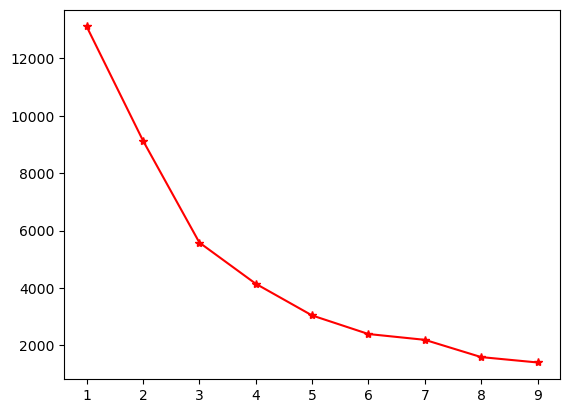

In [113]:
plt.plot(k_range, sse, 'r-*') #Elbow Graph
plt.xlabel ='k'
plt.ylabel = 'Sum of Squared Error'

### Object Creation and data fitting

In [114]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

In [115]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [116]:
kmeans.labels_.shape

(4372,)

In [117]:
RFM["Clusters"]=(kmeans.labels_+1)

In [118]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,2


In [119]:
RFM.Clusters.unique()

array([1, 2, 3])

In [120]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12350.0,332,1,334.40,1
12353.0,226,1,89.00,1
12354.0,254,1,1079.40,1
12355.0,236,1,459.40,1
...,...,...,...,...
18260.0,194,8,2595.00,1
18262.0,162,1,149.48,1
18269.0,380,2,138.90,1


In [121]:
RFM[RFM.Clusters==2]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12352.0,58,11,1545.41,2
12356.0,44,3,2811.43,2
...,...,...,...,...
18277.0,80,2,97.63,2
18278.0,95,1,173.90,2
18282.0,29,3,176.60,2


In [122]:
RFM[RFM.Clusters==3]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12415.0,46,26,123725.45,3
12748.0,22,224,29072.10,3
12971.0,25,89,10930.26,3
13089.0,24,118,57385.88,3
13408.0,23,81,27487.41,3
13694.0,25,60,62653.10,3
13798.0,23,63,36351.42,3
14096.0,26,34,57120.91,3
14156.0,31,66,113384.14,3


In [123]:
final=RFM.groupby("Clusters").mean()[["Recency","Frequency","Monetary"]]
final

,Recency,Frequency,Monetary
Clusters,,,
1,267.719964,1.852755,460.644066
2,61.593084,5.548626,1795.309282
3,27.346154,83.346154,75966.387308


In [124]:
def func(row):
    if row["Clusters"]==2:
        return 'Dimond'
    elif row["Clusters"]==1:
        return 'Gold'
    else:
        return 'Silver'

In [125]:
RFM['group']=RFM.apply(func, axis=1)

In [126]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,1,Gold
12347.0,24,7,4310.00,2,Dimond
12348.0,97,4,1797.24,2,Dimond
12349.0,40,1,1757.55,2,Dimond
12350.0,332,1,334.40,1,Gold
...,...,...,...,...,...
18280.0,299,1,180.60,1,Gold
18281.0,202,1,80.82,1,Gold
18282.0,29,3,176.60,2,Dimond


In [127]:
result = pd.DataFrame(RFM.group.value_counts())

In [128]:
result = result.reset_index()
result

,group,count
0,Dimond,3239
1,Gold,1107
2,Silver,26


In [129]:
import seaborn as sns

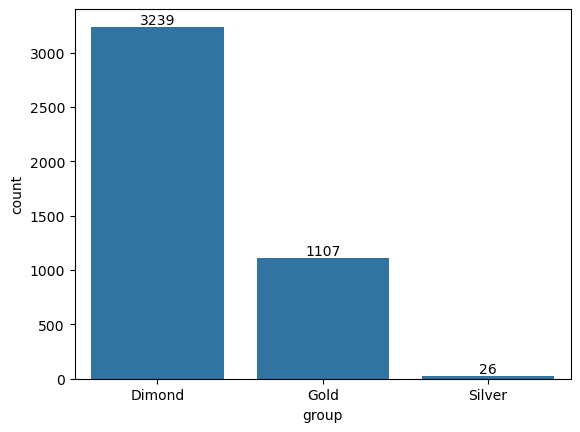

In [130]:
datalabel=sns.barplot(x="group", y="count", data=result, estimator=np.sum)
for i in datalabel.containers:
    datalabel.bar_label(i,)

In [131]:
ABC = RFM[RFM.Clusters==3]

In [132]:
ABC[ABC['Monetary']==ABC['Monetary'].min()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
14527.0,24,86,7711.38,3,Silver
